In [36]:
import numpy as np
import scipy.fftpack
import matplotlib.pyplot as plt

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  import sys


(-0.002, 0.002)

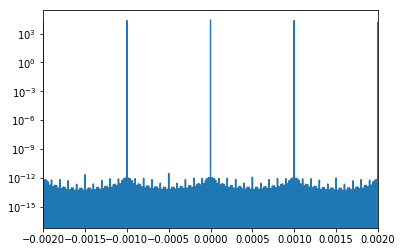

In [86]:
fs = 1e6
fanalysis = 1e9
analysis_periods = 100
def zoh(t, tp):
    if t % (1/fs) < tp: return 1
    else: return 0
t = np.linspace(0, (1/fs)*analysis_periods, (fanalysis / fs)*analysis_periods)
#t = np.linspace(0, 10e6, 100000)
zoh = np.array([zoh(t, 250e-9) for t in t])
#plt.plot(zoh)
spectrum = np.fft.fft(zoh)
#spectrum = scipy.fftpack.fft(zoh)
freq = np.fft.fftfreq(zoh.shape[-1])
plt.semilogy(freq, np.abs(spectrum))
plt.xlim((-0.002, 0.002))

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


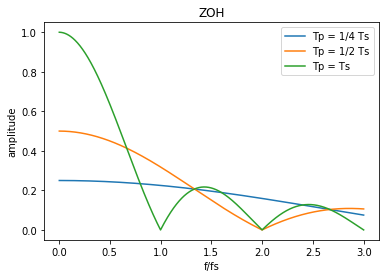

In [100]:
ts = 1e-6
fs = 1/ts
def amp(f, tp):
    return np.abs((tp/ts) * np.sin(np.pi * f * tp) / (np.pi * f * tp))
f = np.linspace(0, 3*fs, 1000)
for tp in [250e-9, 500e-9, 1000e-9]:
    amps = [amp(f, tp) for f in f]
    plt.plot(f / fs, amps)
plt.xlabel('f/fs')
plt.ylabel('amplitude')
plt.title('ZOH')
plt.legend(['Tp = 1/4 Ts', 'Tp = 1/2 Ts', 'Tp = Ts'])
plt.savefig('figs/zoh.pdf')

In [108]:
hist = [28, 21, 19, 23, 22, 20, 15, 21, 23, 18, 19, 19, 23, 18, 24, 29]
inner_range = sum(hist[1:-1])
wavg = (sum(hist[0:-1]) - hist[0]) / (2**4 - 2)
dnl = (np.array(hist[1:-1]) - wavg) / wavg
print(dnl)
print(np.max(dnl))
print(np.min(dnl))

[ 0.03157895 -0.06666667  0.12982456  0.08070175 -0.01754386 -0.26315789
  0.03157895  0.12982456 -0.11578947 -0.06666667 -0.06666667  0.12982456
 -0.11578947  0.17894737]
0.1789473684210526
-0.26315789473684215


In [110]:
inl = np.cumsum(dnl)
print(np.max(inl))
print(np.min(inl))

0.17543859649122795
-0.1929824561403512
